<a href="https://colab.research.google.com/github/kimari-droid/Kk/blob/main/Soundscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SoundScape Dataset Handling - Initial Steps
import pandas as pd

# 1. Read the main dataset
data = pd.read_csv('/content/data.csv')

# 2. Read the genre dataset
genre_data = pd.read_csv('/content/data_by_genres.csv')

# 3. Read the year dataset
year_data = pd.read_csv('/content/data_by_year.csv')

# 4. Read the artist dataset
artist_data = pd.read_csv('/content/data_by_artist.csv')

# 5. Display the first two rows of each dataset
print("Main Data (First 2 Rows):\n", data.head(2), "\n")
print("Genre Data (First 2 Rows):\n", genre_data.head(2), "\n")
print("Year Data (First 2 Rows):\n", year_data.head(2), "\n")
print("Artist Data (First 2 Rows):\n", artist_data.head(2), "\n")

# 6. Retrieve information about data and genre_data
print("Main Data Info:\n")
print(data.info())
print("\nGenre Data Info:\n")
print(genre_data.info())

# 7. Create a 'decade' column using apply() and a lambda function
data['decade'] = data['year'].apply(lambda x: (int(x) // 10) * 10 if pd.notnull(x) else None)

# Display the updated dataset with the 'decade' column
print("\nUpdated Main Data with 'decade' Column:\n", data.head(2))


Main Data (First 2 Rows):
    valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096   1.0   
1    7     0.160   -12.441   1.0   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...         4.0         1921   
1                            Clancy Lowered the Boom         5.0         1921   

   speechiness   tempo  
0       0.0366  80.954  
1       0.4150  60.93

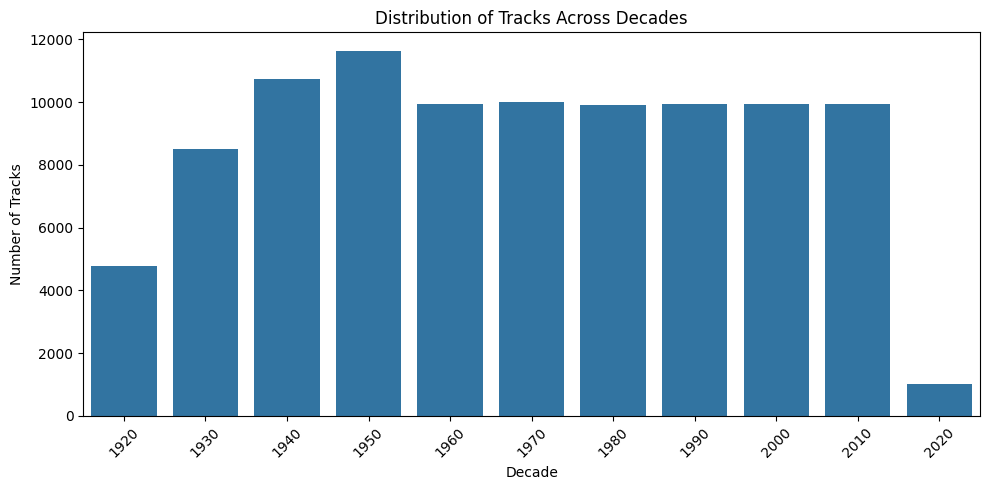

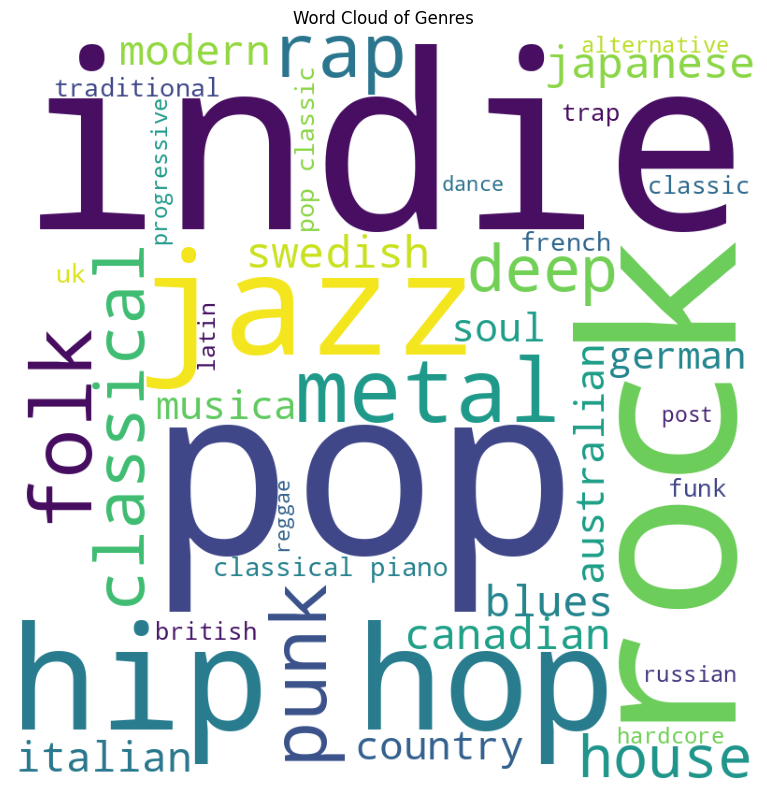

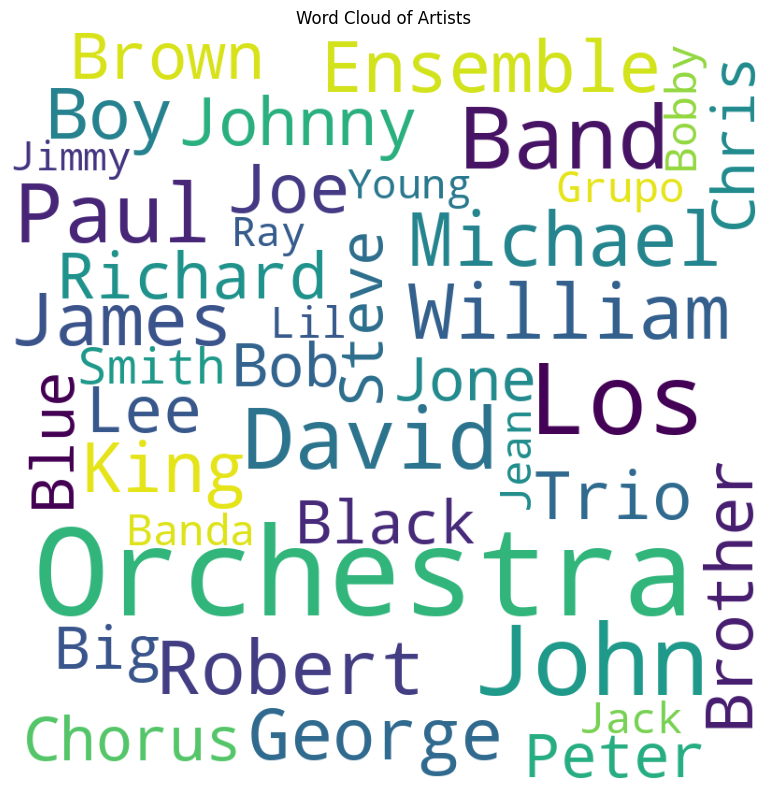

Top 10 Artists With Most Songs Produced:
   count                                            artists
0      1                                                조정현
1      1                   "Cats" 1981 Original London Cast
2      1                          "Cats" 1983 Broadway Cast
3      1        "Fiddler On The Roof” Motion Picture Chorus
4      1     "Fiddler On The Roof” Motion Picture Orchestra
5      1  "Joseph And The Amazing Technicolor Dreamcoat"...
6      1  "Joseph And The Amazing Technicolor Dreamcoat"...
7      1                             "Mama" Helen Teagarden
8      1                                                金智娟
9      1                                                 鄭怡

Top 10 Most Popular Artists:
       popularity          artists
20966        93.0      Ritt Momney
14354        92.0        Lele Pons
15070        90.0  Los Legendarios
11764        89.0         Jerry Di
7463         88.0           Emilee
28263        88.0      salem ilese
23687        88.0       

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming previous data has been read into:
# data, genre_data, year_data, artist_data

# 1. Count plot of tracks across decades
plt.figure(figsize=(10, 5))
sns.countplot(x='decade', data=data)
plt.title('Distribution of Tracks Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line plot of sound features over years
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig1 = px.line(year_data, x='year', y=sound_features, title='Trend of Various Sound Features Over Decades')
fig1.show()

# 3. Line plot of loudness over years
fig2 = px.line(year_data, x='year', y='loudness', title='Trend of Loudness Over Decades')
fig2.show()

# 4. Top 10 genres by popularity
top10_genres = genre_data.groupby('genres').mean(numeric_only=True).sort_values('popularity', ascending=False).head(10).reset_index()
fig3 = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'],
              barmode='group', title='Trend of Various Sound Features Over Top 10 Genres')
fig3.show()

# 5. Word cloud of genres
comment_words = ' '.join(genre_data['genres'].dropna().astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, max_words=40, min_font_size=10).generate(comment_words)

# 6. Plot the word cloud of genres
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Genres")
plt.tight_layout()
plt.show()

# 7. Word cloud of artists
comment_words = ' '.join(artist_data['artists'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, max_words=40, min_font_size=10, min_word_length=3).generate(comment_words)

# 8. Plot the word cloud of artists
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Artists")
plt.tight_layout()
plt.show()

# 9. Top 10 artists with most songs produced
top10_most_song_produced_artists = artist_data['artists'].value_counts().reset_index()
top10_most_song_produced_artists.columns = ['artists', 'count']
print("Top 10 Artists With Most Songs Produced:")
print(top10_most_song_produced_artists[['count', 'artists']].head(10))

# 10. Top 10 most popular artists
top10_popular_artists = artist_data[['artists', 'popularity']].drop_duplicates()
top10_popular_artists = top10_popular_artists.sort_values('popularity', ascending=False).head(10)
print("\nTop 10 Most Popular Artists:")
print(top10_popular_artists[['popularity', 'artists']])
